In [58]:
from sklearn.datasets import load_boston
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings 
warnings.simplefilter('ignore')

In [59]:
boston_dataset = load_boston()

In [60]:
data = pd.DataFrame(data = boston_dataset.data, columns = boston_dataset.feature_names)

In [62]:
data['PRICE'] = boston_dataset.target

## EDA

In [63]:
data.shape

(506, 14)

In [64]:
data.count()

CRIM       506
ZN         506
INDUS      506
CHAS       506
NOX        506
RM         506
AGE        506
DIS        506
RAD        506
TAX        506
PTRATIO    506
B          506
LSTAT      506
PRICE      506
dtype: int64

In [65]:
pd.isnull(data)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,False,False,False,False,False,False,False,False,False,False,False,False,False,False
502,False,False,False,False,False,False,False,False,False,False,False,False,False,False
503,False,False,False,False,False,False,False,False,False,False,False,False,False,False
504,False,False,False,False,False,False,False,False,False,False,False,False,False,False


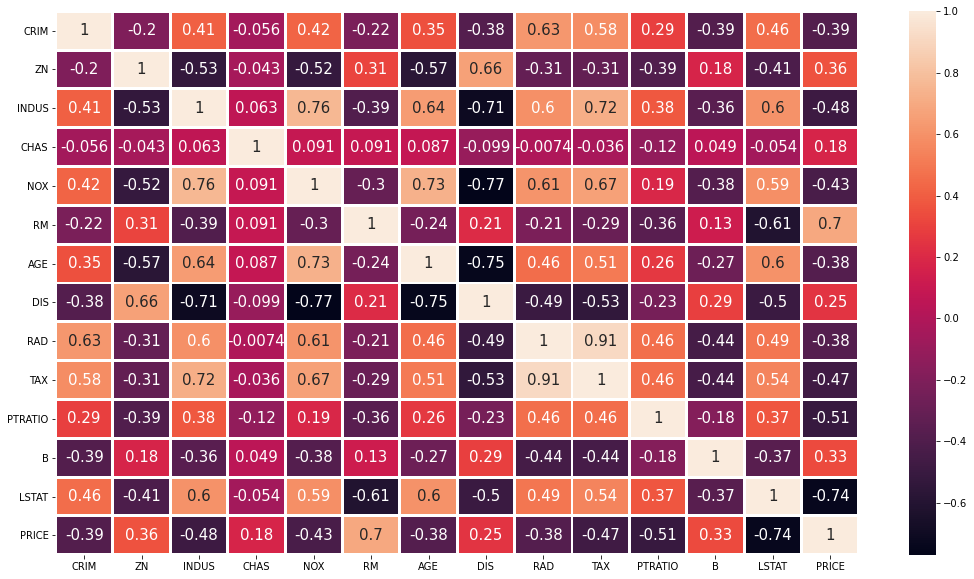

In [66]:
plt.figure(figsize =(18,10))# reduced the size
sns.heatmap(data.corr(), annot=True, annot_kws ={'size':15}, linewidths=2 ) 
plt.xticks(fontsize = 10)#adjusted the fonts on the x axis
plt.yticks(fontsize = 10)# adjusted the font on the y axis
plt.show()

In [67]:

actual_price_skew=round(data['PRICE'].skew(),1)

In [68]:
log_price_skew=round(np.log(data['PRICE']).skew(),1)

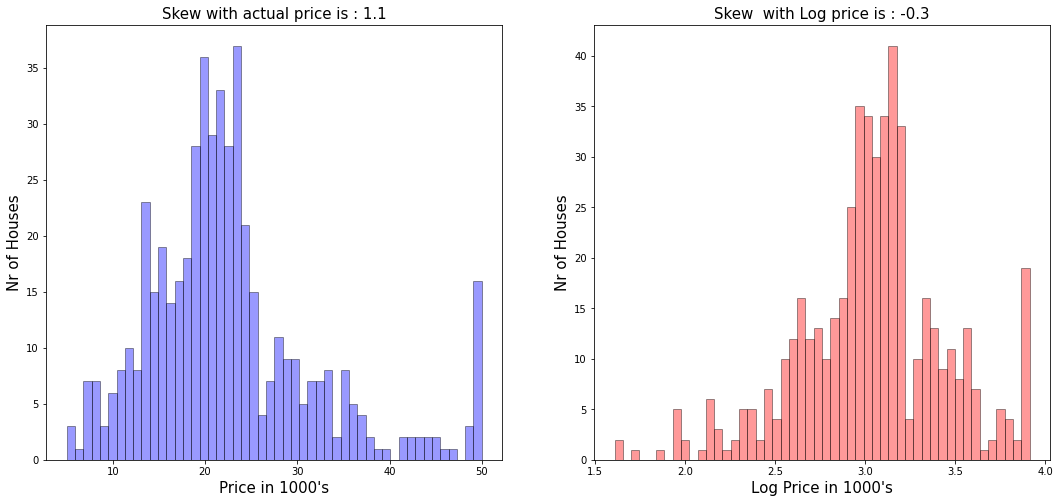

In [69]:
plt.figure(figsize= (18,8))


plt.subplot(1,2,1)
plt.title(f'Skew with actual price is : {actual_price_skew}', fontsize = '15', color = 'black')
plt.hist(data['PRICE'], bins =50, ec = 'black', color = 'blue', alpha = 0.4)
plt.xlabel('Price in 1000\'s', fontsize = 15, color = 'black')
plt.ylabel('Nr of Houses', fontsize = 15, color = 'black')



plt.subplot(1,2,2)
plt.title(f'Skew  with Log price is : {log_price_skew}', fontsize = 15, color = 'black')          
plt.hist(np.log(data['PRICE']), bins =50, ec = 'black', color = 'red', alpha = 0.4)
plt.xlabel('Log Price in 1000\'s', fontsize = 15, color = 'black')
plt.ylabel('Nr of Houses', fontsize = 15, color = 'black')


plt.show()

In [70]:
log_prices = np.log(data['PRICE'])
features = data.drop('PRICE', axis = 1)

In [71]:
X_train, X_test, y_train, y_test = train_test_split(features, log_prices, test_size =0.2, random_state = 10)

In [72]:
X_incl_const = sm.add_constant(X_train)
X_incl_const = X_incl_const.drop(['INDUS','AGE'], axis =1)
model = sm.OLS(y_train, X_incl_const)
results_3 = model.fit()
coef_minus_indus_age = pd.DataFrame({'coef': results_3.params, 'p-value': round(results_3.pvalues, 3)})
print('BIC without INDUS and AGE features and the log price is      :' , results_3.bic, '\n')
print('r-squared  without INDUS and AGE features and log price is   :' , results_3.rsquared,'\n')
print(coef_minus_indus_age)

BIC without INDUS and AGE features and the log price is      : -149.49934294224678 

r-squared  without INDUS and AGE features and log price is   : 0.7918657661852815 

             coef  p-value
const    4.035922    0.000
CRIM    -0.010702    0.000
ZN       0.001461    0.014
CHAS     0.086449    0.025
NOX     -0.616448    0.000
RM       0.076133    0.000
DIS     -0.052692    0.000
RAD      0.013743    0.000
TAX     -0.000590    0.000
PTRATIO -0.033481    0.000
B        0.000518    0.000
LSTAT   -0.030271    0.000


In [73]:
features_final = features.drop(['INDUS','AGE'],axis=1)

In [74]:
features_final

,CRIM,ZN,CHAS,NOX,RM,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,0.0,0.538,6.575,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,0.0,0.469,6.421,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,0.0,0.469,7.185,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,0.0,0.458,6.998,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,0.0,0.458,7.147,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,0.0,0.573,6.593,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,0.0,0.573,6.120,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,0.0,0.573,6.976,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,0.0,0.573,6.794,2.3889,1.0,273.0,21.0,393.45,6.48


In [75]:
features_final.describe()

,CRIM,ZN,CHAS,NOX,RM,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,0.069170,0.554695,6.284634,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,0.253994,0.115878,0.702617,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.000000,0.385000,3.561000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,0.000000,0.449000,5.885500,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,0.000000,0.538000,6.208500,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,0.000000,0.624000,6.623500,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,1.000000,0.871000,8.780000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [157]:
features_final.mean()

CRIM         3.613524
ZN          11.363636
CHAS         0.069170
NOX          0.554695
RM           6.284634
DIS          3.795043
RAD          9.549407
TAX        408.237154
PTRATIO     18.455534
B          356.674032
LSTAT       12.653063
dtype: float64

In [76]:
features_final.median()

CRIM         0.25651
ZN           0.00000
CHAS         0.00000
NOX          0.53800
RM           6.20850
DIS          3.20745
RAD          5.00000
TAX        330.00000
PTRATIO     19.05000
B          391.44000
LSTAT       11.36000
dtype: float64

In [77]:
features_final.skew()

CRIM       5.223149
ZN         2.225666
CHAS       3.405904
NOX        0.729308
RM         0.403612
DIS        1.011781
RAD        1.004815
TAX        0.669956
PTRATIO   -0.802325
B         -2.890374
LSTAT      0.906460
dtype: float64

In [78]:
X_train, X_test, y_train, y_test = train_test_split(features_final, log_prices, test_size =0.2, random_state = 10)

In [79]:
regr = LinearRegression()
regr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [80]:
regr.predict(X_test)

array([3.40128441, 3.45268451, 3.41883955, 3.07469539, 2.92413995,
       2.72584801, 3.59386363, 2.70429854, 3.18526117, 3.6158907 ,
       2.98519227, 3.40225914, 3.31612728, 3.54593538, 3.56173911,
       3.67865175, 3.22743297, 3.11412724, 3.22765618, 2.99199058,
       3.46751745, 2.77258537, 3.17095954, 3.2314144 , 3.47668247,
       3.05840192, 2.88810581, 2.7565389 , 3.73189989, 1.97185187,
       3.39355772, 3.44309459, 3.20105023, 3.21297792, 2.87758873,
       2.9487114 , 2.05548564, 3.53857706, 3.30313777, 3.28655765,
       3.55241062, 3.36993948, 2.74759304, 3.44888169, 2.85533498,
       3.27470717, 2.88758438, 2.93750475, 3.66890124, 2.79693565,
       3.14800599, 2.82475361, 3.17086798, 3.52962127, 3.23005374,
       3.48843325, 3.01039999, 2.92798896, 2.97661163, 2.95894076,
       2.92212997, 3.09441218, 3.69623405, 3.75204352, 3.43352919,
       2.75979947, 3.23100082, 2.12735469, 3.44869066, 3.31826578,
       2.79757496, 3.32399142, 2.90455609, 3.1816128 , 3.14118

In [50]:
type(X_test)

pandas.core.frame.DataFrame

In [81]:
X = pd.DataFrame({'CRIM':['0.05'],'ZN':['20'],'CHAS':['1.0'],'NOX':['0.3'],'RM':['6'],'DIS':['3.5'],'RAD':['5'],'TAX':['200'],'PTRATIO':['15'],'B':['300'],'LSTAT':[10]})

In [82]:
X

,CRIM,ZN,CHAS,NOX,RM,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.05,20,1.0,0.3,6,3.5,5,200,15,300,10


In [83]:
regr.predict(X)


array([3.53964479])

In [54]:
X_incl_const = sm.add_constant(X_train)
model = sm.OLS(y_train, X_incl_const)
results = model.fit()

In [87]:
X = pd.DataFrame({'CRIM':data['CRIM'].mean(),'ZN':data['ZN'].mean(),'CHAS':['1.0'],'NOX':data['NOX'].mean(),'RM':['6'],'DIS':data['DIS'].mean(),'RAD':data['RAD'].mean(),'TAX':data['TAX'].mean(),'PTRATIO':['15'],'B':data['B'].mean(),'LSTAT':data['LSTAT'].mean()})

In [88]:
X

,CRIM,ZN,CHAS,NOX,RM,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,3.613524,11.363636,1.0,0.554695,6,3.795043,9.549407,408.237154,15,356.674032,12.653063


In [89]:
regr.predict(X)

array([3.2049687])

In [90]:
room = 6
chas = 1
ptratio = 15

In [92]:
X = pd.DataFrame({'CRIM':data['CRIM'].mean(),'ZN':data['ZN'].mean(),'CHAS':[chas],'NOX':data['NOX'].mean(),'RM':[room],'DIS':data['DIS'].mean(),'RAD':data['RAD'].mean(),'TAX':data['TAX'].mean(),'PTRATIO':[ptratio],'B':data['B'].mean(),'LSTAT':data['LSTAT'].mean()})

In [93]:
X

,CRIM,ZN,CHAS,NOX,RM,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,3.613524,11.363636,1,0.554695,6,3.795043,9.549407,408.237154,15,356.674032,12.653063


In [95]:
z=regr.predict(X)

In [96]:
np.e**z*1000

array([24654.72833704])

In [97]:
reduced_log_mse = round(results.mse_resid, 3)# for later use and comparision
reduced_log_rsquared = round(results.rsquared, 3) # for later use and comparisi

In [99]:
upper_bound = z + 2*np.sqrt(reduced_log_mse)
print('The upper bound in log prices for a 95% prediction interval is ', upper_bound)
print('The upper bound in normal prices is $', np.e**upper_bound * 1000)

lower_bound = z - 2*np.sqrt(reduced_log_mse)
print('The lower bound in log prices for a 95% prediction interval is ', lower_bound)
print('The lower bound in normal prices is $', np.e**lower_bound * 1000)

The upper bound in log prices for a 95% prediction interval is  [3.57913444]
The upper bound in normal prices is $ [35842.50356919]
The lower bound in log prices for a 95% prediction interval is  [2.83080296]
The lower bound in normal prices is $ [16959.07285605]


In [100]:
upper_bound = z + np.sqrt(reduced_log_mse)
print('The upper bound in log prices for a 95% prediction interval is ', upper_bound)
print('The upper bound in normal prices is $', np.e**upper_bound * 1000)

lower_bound = z - np.sqrt(reduced_log_mse)
print('The lower bound in log prices for a 95% prediction interval is ', lower_bound)
print('The lower bound in normal prices is $', np.e**lower_bound * 1000)

The upper bound in log prices for a 95% prediction interval is  [3.39205157]
The upper bound in normal prices is $ [29726.87653316]
The lower bound in log prices for a 95% prediction interval is  [3.01788583]
The lower bound in normal prices is $ [20448.01540771]


In [136]:
number_of_rooms = eval(input('enter number of room needed :'))
if number_of_rooms >0 :
  room = number_of_rooms
  print('required number of rooms :',room)
else:
  print('Number of rooms should be greater than zero ')
student_teacher_ratio = eval(input('enter the ratio of student to teacher needed in near by school :'))
if student_teacher_ratio >0 :
  ptratio = student_teacher_ratio
  print('required student teacher student ratio at near by school is:',ptratio)
else :
  print('ratio cannot be negative')
chals_river = eval(input('enter 1 if you want house near to chals river if no then enter 0 : '))
if ((chals_river != 0) and (chals_river != 1)):
  print('please the enter the option properly either 0 or 1')
elif (chals_river==0) :
  print('The house needed is to be far from the river')
else :
  print('The house needed to br near to river ')

enter number of room needed :4
required number of rooms : 4
enter the ratio of student to teacher needed in near by school :20
required student teacher student ratio at near by school is: 20
enter 1 if you want house near to chals river if no then enter 0 : 0
The house needed is to be far from the river


In [135]:
number_of_rooms = eval(input('enter number of room needed :'))
student_teacher_ratio = eval(input('enter the ratio of student to teacher needed in near by school :'))
chals_river = eval(input('enter 1 if you want house near to chals river if no then enter 0 : '))
if number_of_rooms >0 :
  room = number_of_rooms
  print('required number of rooms :',room)
else:
  print('Number of rooms should be greater than zero ')

KeyboardInterrupt: ignored

In [110]:
X = pd.DataFrame({'CRIM':data['CRIM'].mean(),'ZN':data['ZN'].mean(),'CHAS':[chals_river],'NOX':data['NOX'].mean(),'RM':[number_of_rooms],'DIS':data['DIS'].mean(),'RAD':data['RAD'].mean(),'TAX':data['TAX'].mean(),'PTRATIO':[student_teacher_ratio],'B':data['B'].mean(),'LSTAT':data['LSTAT'].mean()})

In [104]:
regr.predict(X)

array([2.70275033])

In [163]:
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

#print(color.BOLD + 'Hello World !' + color.END)
def prediction_of_house_price():
  number_of_rooms = eval(input('enter number of room needed :'))
  if number_of_rooms >0 :
    room = number_of_rooms
    print('required number of rooms :',room)
  else:
    print('Number of rooms should be greater than zero ')
  student_teacher_ratio = eval(input('enter the ratio of student to teacher needed in near by school :'))
  if student_teacher_ratio >0 :
    ptratio = student_teacher_ratio
    print('required student teacher student ratio at near by school is:',ptratio)
  else :
    print('ratio cannot be negative')
  chals_river = eval(input('enter 1 if you want house near to chals river if no then enter 0 : '))
  if ((chals_river != 0) and (chals_river != 1)):
     print('please the enter the option properly either 0 or 1')
  elif (chals_river==0) :
    chas = chals_river
    print('The house needed is to be far from the river and given chals_river _index :', chas)
  else :
    chas = chals_river
    print('The house needed to br near to river and given chals_river _index:', chas)
  try:
    if (room > 0) or (ptratio > 0) or (chas  == 0 | 1):
      X = pd.DataFrame({'CRIM':data['CRIM'].median(),'ZN':data['ZN'].median(),'CHAS':[chas],'NOX':data['NOX'].mean(),'RM':[room],'DIS':data['DIS'].median(),'RAD':data['RAD'].median(),'TAX':data['TAX'].median(),'PTRATIO':[ptratio],'B':data['B'].mean(),'LSTAT':data['LSTAT'].median()})
      z=regr.predict(X)
      upper_bound = z + 2*np.sqrt(reduced_log_mse)
      print('The upper bound in log prices for a 95% prediction interval is ', upper_bound)
      print('The upper bound in normal prices is $', np.e**upper_bound * 1000)

      lower_bound = z - 2*np.sqrt(reduced_log_mse)
      print('The lower bound in log prices for a 95% prediction interval is ', lower_bound)
      print('The lower bound in normal prices is $', np.e**lower_bound * 1000)
      upper_bound1 = z + np.sqrt(reduced_log_mse)
      print('The upper bound in log prices for a 68% prediction interval is ', upper_bound1)
      print('The upper bound in normal prices is $', np.e**upper_bound1 * 1000)

      lower_bound1 = z - np.sqrt(reduced_log_mse)
      print('The lower bound in log prices for a 68% prediction interval is ', lower_bound1)
      print('The lower bound in normal prices is $', np.e**lower_bound1 * 1000)

      print(X)
  except :
    print(color.RED +'rerun the function again u might have entered something wrong might be rooms might be negative or zero or the ptratio might be negative or zero or the chals_river index might not be 0 or 1'+ color.END)


In [164]:
prediction_of_house_price()

enter number of room needed :-4
Number of rooms should be greater than zero 
enter the ratio of student to teacher needed in near by school :12
required student teacher student ratio at near by school is: 12
enter 1 if you want house near to chals river if no then enter 0 : 1
The house needed to br near to river and given chals_river _index: 1
rerun the function again u might have entered something wrong might be rooms might be negative or zero or the ptratio might be negative or zero or the chals_river index might not be 0 or 1


In [ ]:
2